## Оглавление:

[1. Изучение общей информации о датафрейме](#step1)  
[2. Предобработка данных](#step2)  
[3. Добавление новых столбцов в датафрейм](#step3)  
[4. Исследовательский анализ данных](#step4)  
[5. Общий вывод](#step5)  

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша задача — установить параметры для определения рыночной стоимости объектов недвижимости. В дальнейшем на основании нашего исследования можно построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.   

Нам предстоит определить, какие, казалось бы, неочевидные факторы больше всего влияют на стоимость недвижимости в Санкт-Петербурге.

## Описание данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
* balcony — число балконов  
* ceiling_height — высота потолков (м)  
* cityCenters_nearest — расстояние до центра города (м)  
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
* first_day_exposition — дата публикации  
* floor — этаж  
* floors_total — всего этажей в доме  
* is_apartment — апартаменты (булев тип)  
* kitchen_area — площадь кухни в квадратных метрах (м²)  
* last_price — цена на момент снятия с публикации  
* living_area — жилая площадь в квадратных метрах(м²)  
* locality_name — название населённого пункта  
* open_plan — свободная планировка (булев тип)  
* parks_around3000 — число парков в радиусе 3 км  
* parks_nearest — расстояние до ближайшего парка (м)  
* ponds_around3000 — число водоёмов в радиусе 3 км  
* ponds_nearest — расстояние до ближайшего водоёма (м)  
* rooms — число комнат  
* studio — квартира-студия (булев тип)  
* total_area — площадь квартиры в квадратных метрах (м²)  
* total_images — число фотографий квартиры в объявлении  

### 1. Изучение общей информации о датафрейме <a id='step1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#откроем файл, выбрав табуляцию в качестве разделителя столбцов
try:
    realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    realty = pd.read_csv('/home/an4ouce/datasets/real_estate_data.csv', sep='\t')

#выведем на экран первые 10 строк датафрейма
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим довольно много пропущенных значений. Определим их важность для дальнейшего исследования, подумаем о причинах их возникновения, возможно, некоторые из них заполним. Для наглядности построим график процентного соотношения пропусков в каждом столбце. Посчитаем среднее значение пропусков.

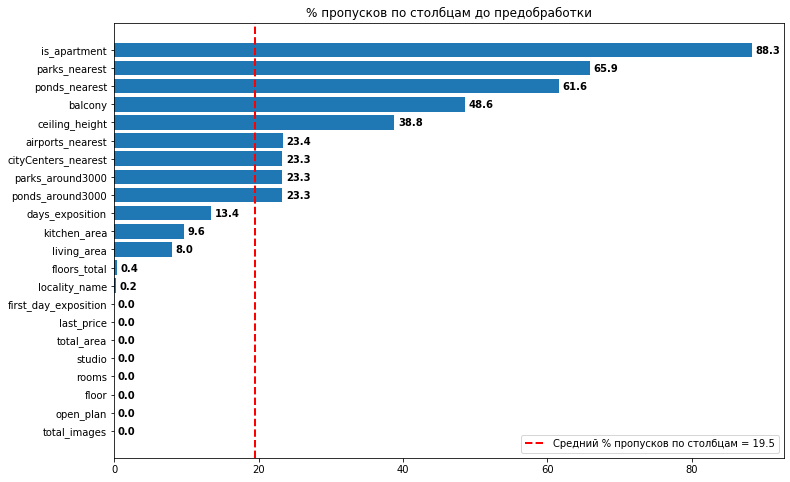

In [2]:
total_data = 23699 #общее число строк
columns_data = realty.columns.values.tolist()

nan = []

for col in columns_data:
    quantity_not_nan = realty[col].count()
    percent_nan = ((total_data - quantity_not_nan) / total_data) * 100
    nan.append(percent_nan)
    
nan_percent_before = pd.Series(nan, index=columns_data)
nan_percent_before_mean = nan_percent_before.mean()
nan_percent_before.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(nan_percent_before.index, nan_percent_before.values)
ax.set_title('% пропусков по столбцам до предобработки')

#построим линию, показывающую средний % пропусков по столбцам
plt.axvline(
    x=nan_percent_before_mean, linewidth=2,
    label='Средний % пропусков по столбцам = {}'.format(round(nan_percent_before_mean, 1)),
    color='r', linestyle='--')

plt.legend()

for i in ax.patches:
    plt.text(i.get_width()+0.5,
    i.get_y()+0.2, str(round(i.get_width(),1)),
    fontsize=10, fontweight='bold', color='black')

plt.show()

Пока выглядит немного страшно, ввиду большого количества пропущенных значений. 
Сильнее всех выбиваются за среднее значение пропуска в столбцах ponds_nearest, parks_nearest, balcony, is_apartment и ceiling_height.
Предположим по каждому из параметров:
* ponds_nearest, parks_nearest - данные вводились самими пользователями и были необязательными к заполнению. Так как это не самые важные параметры для нашего исследования, пропуски по ним оставим, как есть.
* balcony - скорее всего, если человек не указал количество балконов, то их действительно нет (вряд ли кто-то может забыть, сколько у него балконов в квартире). Заменим пропущенные значения на ноль.
* is_apartment - видимо, тоже необязательный параметр к заполнению при подаче объявления, и судя по такому количеству пропусков, не все люди понимают разницу между апартаментами и жилым помещением. Можно было бы заменить все пропуски на False, но тогда получится, что из всего датафрейма (23699 строк) всего 50 апартаментов. Оставим пропуски в этом столбце в покое, тем более что они не важны для нашего исследования.
* ceiling_height - вот это важный параметр, как для продажи квартиры, так и для нашего исследования, но отчего-то его не указали 38,8% продавцов. Я не очень разбираюсь в архитектуре Санкт-Петербурга, была там всего раз, но думаю, там, как и в Москве, есть исторический центр с домами-сталинками, есть престижные районы, и есть окраина с панельными домами. Предположим, что с удалением от центра города потолки становятся ниже. Далее проверим эту гипотезу.

Не так страшно выбиваются за среднее: 
* ponds_around3000, parks_around3000, cityCenters_nearest, airports_nearest - эти данные должны были считаться автоматически, ведь вряд ли кто-то знает точное расстояние до ближайшего пруда, парка, центра города и аэропорта. Возможно, данные просто не были выгружены системой. Оставим пропуски в покое.

Теперь по остальным пропускам:
* days_exposition - если есть пропуски в этом столбце, то получается, что либо квартира до сих пор не продана, либо человек продал ее, но забыл закрыть объявление. По информации Яндекс.недвижимость, объявления для других регионов (кроме Москвы) находятся на сайте от 45 дней, далее когда-то автоматически закрываются. Далее проверим эту гипотезу.
* kitchen_area, living_area - видимо, не все знают свою жилую площадь и площадь кухни. Главное, что все знают общую площадь, и это хорошо. Предположим, что кухня и жилая площадь должны коррелироваться с общей, далее проверим это.
* floors_total - странно, что некоторые не знают этажность своего дома. Так как далее в нашем исследовании нужно категоризировать этаж в объявлении (первый, последний, другой), мы сможем это сделать по принципу(если этаж = 1, то "первый", если этаж = floors_total, то "последний", если этаж != floors_total, либо floors_total неизвестно, то "другой". Тем более, что как раз "других" у нас большинство.
* locality_name - самое малое количество пропусков, скорее всего, люди думали, раз размещают объявление о продаже недвижимости в Санкт-Петербурге, то не нужно ничего указывать (а про Ленинградскую область забыли). Далее проверим это, определив границы города, и для объявлений, что будет входить в границы, укажем "Санкт-Петербург".

### Вывод:
данные "грязноваты", нужно с ними дополнительно поработать, прежде чем приступать к исследованию.

### 2. Предобработка данных  <a id='step2'></a>

Воспользуемся методами info() и describe() для определения типа данных и поиска аномалий.

In [3]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Предложения по корректировке типов данных:
* last_price - округлим до целого числа, без копеек;
* first_day_exposition - переведем в datetime;
* balcony - переведем в int64 (после заполнения пропусков нулями).

Остальное не будем трогать. Логично было бы перевести столбцы floors_total, parks_around3000, ponds_around3000, airports_nearest, cityCenters_nearest, days_exposition в int64, но Pandas не дает перевести их, ввиду наличия значений NaN. Нулями заполнять нелогично, потому что, к примеру, если заполнить cityCenters_nearest нулями, то получатся квартиры прямо на Дворцовой площади. Формат float64 нас вполне устраивает - он допускает значения NaN, можно проводить с ними математические операции.

In [4]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Что же, аномалии есть: квартира за 12190 рублей, квартиры из 19 комнат, общая площадь 900 кв.м., метровые и 100-метровые потолки. Хотя возможно, не все из этих значений являются аномалиями. Проверим некоторые из них:

In [5]:
realty.query('rooms == 19 or total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Ну почему бы и нет. Пентхаус 900 квадратов с 12 комнатами и соответствующей ценой. 19 комнат на втором этаже пятиэтажки выглядит более странно, предположим, что это нежилое помещение.

In [6]:
realty.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Строк с нулевым количеством комнат много. Вероятно, это квартиры-студии, свободная планировка, либо комнаты в коммунальной квартире. Скорее всего, именно для них не указана жилая площадь и площадь кухни (далее проверим это).

In [7]:
realty.query('last_price == 12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


А вот здесь ошибка. Квартира 109 кв.м не может стоить 12190 рублей нигде. Тут цена должна стоять в млн.руб. Исправим:

In [8]:
realty.loc[8793, 'last_price'] = realty.loc[8793, 'last_price']*1000
realty.loc[8793, 'last_price'] 

12190000.0

In [9]:
realty.query('ceiling_height == 1.0 or ceiling_height == 100.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.0,12.0,32.4,7,NaN,...,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


С потолками кто-то не заморачивался. Будем считать их выбросами. И 5 балконов в однокомнатной квартире, конечно, классно. Посмотрим, есть ли в датафрейме дубликаты:

In [10]:
realty.duplicated().sum()

0

Дубликатов нет, уже хорошо. Пора заняться заполнением пропусков и изменением типов данных. Думаю, стоит округлить значения в столбце days_exposition до одного знака после запятой, так как в дальнейшем нам предстоит проверить ранее выдвинутую гипотезу об автоматически закрытых системой Яндекс.Недвижимость объявлениях, а в указанном столбце есть много неудобных для анализа значений (с длинным "хвостом"). На int64 заменить тип данных не получится, так как есть пропуски.

In [11]:
realty['days_exposition'] = realty['days_exposition'].round(1)

In [12]:
#заполним пропуски в столбце balcony нулями и преобразуем в int
realty['balcony'] = realty['balcony'].fillna(0).astype('int')

#переведем столбец first_day_exposition в datetime
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%d')

#переведем столбец last_price в int, отбросив копейки
realty['last_price'] = realty['last_price'].astype('int')

In [13]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

Посмотрим, как коррелируются значения столбцов друг с другом:

In [14]:
realty.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104449,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104449,1.000000,0.653741,0.363340,0.085429,-0.006881,0.566487,0.026760,-0.025366,-0.008805,0.520167,0.008530,-0.026205,-0.206781,0.151086,-0.016324,0.159951,-0.084809,0.081103
total_area,0.115352,0.653741,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363340,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085429,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006881,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566487,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026760,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025366,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008805,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Не очень наглядно. Попробуем визуализировать:

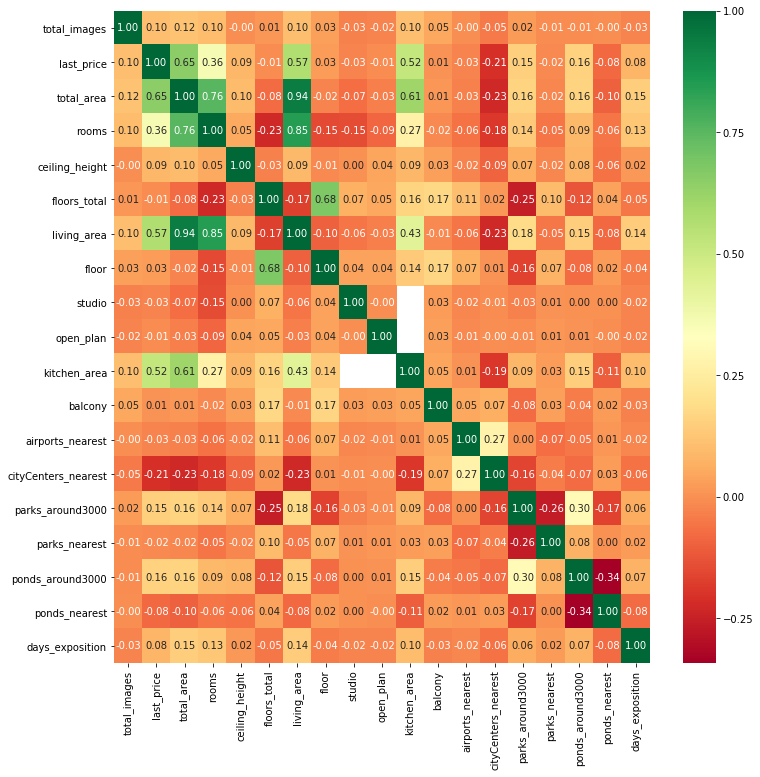

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(realty.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

Как видно, жилая площадь действительно очень хорошо коррелируется с общей площадью (коэффициент корреляции = 0,94). Соотвественно, чем больше общая площадь, тем больше жилая (что логично, вряд ли кто-то бы хотел увеличить площадь санузла за счет жилой). А вот кухня имеет коэффициент корреляции с общей площадью 0,61. Это довольно средняя корреляция, потому нельзя сказать, что увеличение общей площади всегда ведет к увеличению площади кухни. Посмотрим, какую часть всех данных занимают квартиры-студии и квартиры со свободной планировкой:

In [16]:
realty.query('open_plan == True or studio == True')['studio'].count()

216

216 значений из всего датафрейма. Получается, это не они искажают общую картину, а просто люди не стали заполнять эту информацию при подаче объявления. Итак, что же будем делать? Ввиду высокой корреляции жилой площади с общей, разобьем квартиры на 4 категории (маленькая, средняя, больше средней, большая), посчитаем среднюю жилую площадь и заполним пропуски. Но для начала неплохо бы отбросить выбросы, их немного, но они могут исказить общую картину:

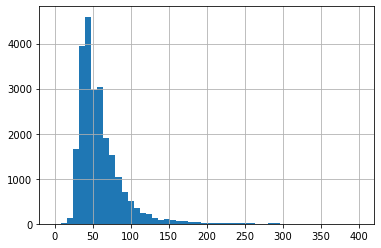

In [17]:
realty['total_area'].hist(bins=50, range=(0,400))
plt.show()

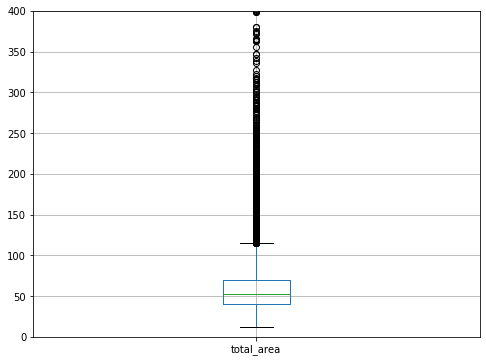

In [18]:
plt.figure(figsize=(8,6))
plt.ylim(0,400)
realty.boxplot('total_area')
plt.show()

Как видно из графиков, значения свыше 250 м.кв. можно считать выбросами и не учитывать их в группировке. Распределение по квантилям взяли выше из метода describe().

In [19]:
def type_of_total_area(area):
    if 12 <= area <= 40:
        return 'Маленькая'
    if 40 < area <= 52:
        return 'Средняя'
    if 52 < area <= 69.9:
        return 'Больше средней'
    if 69.9 < area <= 250:
        return 'Большая'

realty['type_of_total_area'] = realty['total_area'].apply(type_of_total_area)

#группируем по типам и создаем переменную средней жилой площади
living_area_mean = realty.groupby('type_of_total_area')['living_area'].transform('mean')

realty['living_area'] = realty['living_area'].fillna(living_area_mean)

Пропуски в kitchen_area мы таким же образом заполнить не сможем, тут весьма средняя корреляция. Будем работать с известными значениями. Теперь попробуем проверить гипотезу о том, что с удалением от центра Санкт-Петербурга высота потолков уменьшается. Глядя на карту города, определяем его границу (17 км расстояние от центра до КАД по Московскому проспекту), определяем радиус охвата его исторического центра (3 км) и престижного центра (3-8 км, сюда входят Василеостровский, Петроградский районы). Для начала уберем выбросы:

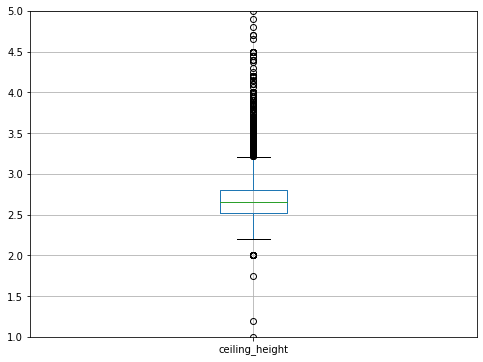

In [20]:
plt.figure(figsize=(8,6))
plt.ylim(1,5)
realty.boxplot('ceiling_height')
plt.show()

In [21]:
def distance_from_center(distance):
    #181 метр - минимальная дистанция от центра согласно describe()
    if 181 <= distance <= 3000:
        return 'исторический центр'
    elif 3000 < distance <= 8000:
        return 'престижный центр'
    elif 8000 < distance <= 17000:
        return 'остальные районы'
    elif distance > 17000:
        return 'за КАДом'

realty['category_from_center_distance'] = realty['cityCenters_nearest'].apply(distance_from_center)

ceiling_height_by_categories = (
    #потолки менее 2.3 и более 3.5 метров - выбросы
    realty.query('ceiling_height > 2.3 or ceiling_height <= 3.5')
    .pivot_table(index='category_from_center_distance', values='ceiling_height')
    .sort_values(by='ceiling_height', ascending=False)
    .round(2)
)

#средние значения высоты потолков по категориям
ceiling_height_by_categories

,ceiling_height
category_from_center_distance,
исторический центр,3.23
престижный центр,3.07
остальные районы,2.71
за КАДом,2.68


Гипотеза подтвердилась. В историческом и престижном центре Санкт-Петербурга потолки действительно выше, чем в других районах и за городом. Теперь можем заполнить пропуски в столбце ceiling_height полученными значениями:

In [22]:
ceiling_height_mean = realty.groupby('category_from_center_distance')['ceiling_height'].transform('mean')

realty['ceiling_height'] = realty['ceiling_height'].fillna(ceiling_height_mean).round(2)

realty[['cityCenters_nearest', 'category_from_center_distance', 'ceiling_height']].head()

,cityCenters_nearest,category_from_center_distance,ceiling_height
0,16028.0,остальные районы,2.70
1,18603.0,за КАДом,2.68
2,13933.0,остальные районы,2.71
3,6800.0,престижный центр,3.07
4,8098.0,остальные районы,3.03


In [23]:
realty['ceiling_height'].isnull().sum()

2575

В столбце ceiling_height осталось 2575 пропусков, это те объявления, для которых не было указано расстояние до центра города. Скорее всего, это пригород, ведь для чего, например, покупателям квартиры в Кронштадте знать расстояние до центра Санкт-Петербурга?

In [24]:
realty.query('"Санкт-Петербург" not in locality_name')['ceiling_height'].isnull().sum()

2545

Так и есть. 2545 пропусков у нас относятся к пригороду и 30 - к Санкт-Петербургу.
Теперь, раз уж мы знаем расстояние до КАДа, можем заполнить пропуски в столбце locality_name. Посчитаем их количество:

In [25]:
realty['locality_name'].isnull().sum()

49

In [26]:
realty.loc[1097, ['cityCenters_nearest', 'locality_name']]

cityCenters_nearest    4258
locality_name           NaN
Name: 1097, dtype: object

Видим, что в указанной ячейке у нас отсутствует название населенного пункта, хотя расстояние до центра города указано, и более того, это "престижный центр". Заменим пустые значения locality_name на "Санкт-Петербург". После проверим, что значение действительно изменилось:

In [27]:
realty.loc[(realty['locality_name'].isna()) & (realty['cityCenters_nearest'] <= 17000), 'locality_name'] = "Санкт-Петербург"

In [28]:
realty.loc[1097, ['cityCenters_nearest', 'locality_name']]

cityCenters_nearest               4258
locality_name          Санкт-Петербург
Name: 1097, dtype: object

In [29]:
realty['locality_name'].isnull().sum()

20

Осталось 20 пропусков в столбце locality_name. 

In [30]:
realty.query('locality_name.isnull()')[['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
6765,NaN,17369.0
8986,NaN,31813.0
13223,NaN,17369.0
13690,NaN,23659.0
14273,NaN,17369.0
14342,NaN,NaN
16499,NaN,17369.0


Собственно, остался пригород, как мы и предполагали, и данные с пропусками в столбце cityCenters_nearest. Посмотрим, как изменилось процентное содержание пропусков в столбцах после того, как мы с ними поработали:

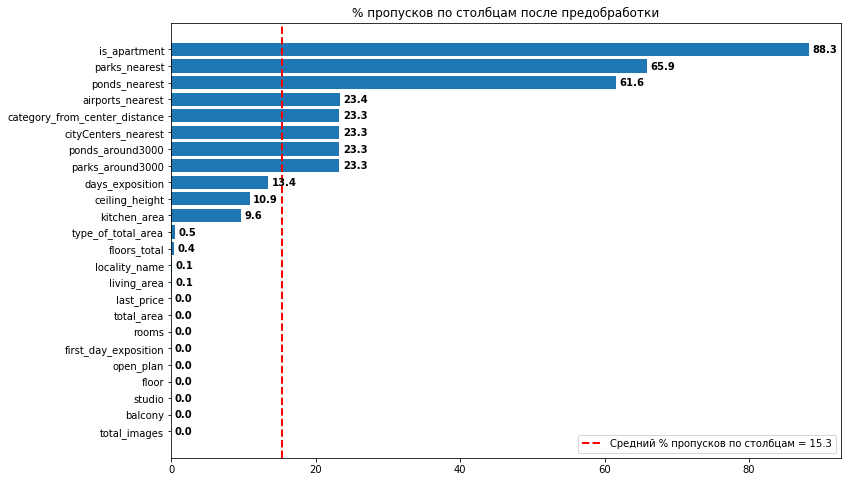

In [31]:
columns_data = realty.columns.values.tolist()

nan = []

for col in columns_data:
    quantity_not_nan = realty[col].count()
    percent_nan = ((total_data - quantity_not_nan) / total_data) * 100
    nan.append(percent_nan)
    
nan_percent_after = pd.Series(nan, index=columns_data)
nan_percent_after_mean = nan_percent_after.mean()
nan_percent_after.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(nan_percent_after.index, nan_percent_after.values)
ax.set_title('% пропусков по столбцам после предобработки')

#построим линию, показывающую средний % пропусков по столбцам
plt.axvline(
    x=nan_percent_after_mean, linewidth=2,
    label='Средний % пропусков по столбцам = {}'.format(round(nan_percent_after_mean, 1)),
    color='r', linestyle='--')

plt.legend()

for i in ax.patches:
    plt.text(i.get_width()+0.5,
    i.get_y()+0.2, str(round(i.get_width(),1)),
    fontsize=10, fontweight='bold', color='black')

### Вывод:
Мы проделали большую работу по поиску закономерностей в данных, заполнили некоторые пропущенные значения, средний процент пропусков упал до 15,3%, но тут нужно учесть, что некоторые пропуска мы не заполнили намеренно, дабы не исказить данные. К тому же, добавились новые столбцы, например type_of_total_area и category_from_center_distance, которые создавались по столбцам с пропусками, и это конечно, внесло свою лепту в средний процент пропусков.

### 3. Добавление новых столбцов в датафрейм  <a id='step3'></a>

Теперь добавим в таблицу столбцы, содержащие требуемые сведения:
* year_of_publication - год публикации объявления;
* month_of_publication - месяц публикации объявления;
* day_of_publication - день недели публикации объявления.

Все данные есть в стобце first_day_exposition, так как он уже переведен в формат datetime64.

In [32]:
realty['year_of_publication'] = realty['first_day_exposition'].dt.year
realty['month_of_publication'] = realty['first_day_exposition'].dt.month
realty['day_of_publication'] = realty['first_day_exposition'].dt.weekday

def number_to_weekday(number):
    if number == 0:
        return '1.Понедельник'
    elif number == 1:
        return '2.Вторник'
    elif number == 2:
        return '3.Среда'
    elif number == 3:
        return '4.Четверг'
    elif number == 4:
        return '5.Пятница'
    elif number == 5:
        return '6.Суббота'
    else:
        return '7.Воскресенье'

realty['day_of_publication'] = realty['day_of_publication'].apply(number_to_weekday)
realty[['first_day_exposition', 'year_of_publication', 'month_of_publication', 'day_of_publication']].head()

,first_day_exposition,year_of_publication,month_of_publication,day_of_publication
0,2019-03-07,2019,3,4.Четверг
1,2018-12-04,2018,12,2.Вторник
2,2015-08-20,2015,8,4.Четверг
3,2015-07-24,2015,7,5.Пятница
4,2018-06-19,2018,6,2.Вторник


Разобьем этажи, указанные в объявлении, на категории: первый, последний, другой. 

In [33]:
def floor_type(floor, floors_total):
    if floor == 1:
        return 'Первый'
    if floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'

realty['floor_type'] = realty.apply(lambda row: floor_type(row['floor'], row['floors_total']),axis=1)
realty[['floor', 'floors_total', 'floor_type']].head()
    

,floor,floors_total,floor_type
0,8,16.0,Другой
1,1,11.0,Первый
2,4,5.0,Другой
3,9,14.0,Другой
4,13,14.0,Другой


Рассчитаем цену за квадратный метр, благо, столбцы last_price и total_area у нас не имеют пропусков. Имеет смысл привести указанные столбцы к тыс.руб для удобства просмотра и дальнейшего исследования:

In [34]:
realty['last_price'] = (realty['last_price'] / 1000).astype('int')
realty['price_for_m2'] = (realty['last_price'] / realty['total_area']).round(1)
realty[['last_price', 'total_area', 'price_for_m2']].head()   

,last_price,total_area,price_for_m2
0,13000,108.0,120.4
1,3350,40.4,82.9
2,5196,56.0,92.8
3,64900,159.0,408.2
4,10000,100.0,100.0


Теперь добавим столбцы с отношением жилой площади к общей, а также кухни к общей. 

In [35]:
realty['living_to_total_area'] = (realty['living_area'] / realty['total_area']).round(2)
realty['kitchen_to_total_area'] = (realty['kitchen_area'] / realty['total_area']).round(2)
realty[['total_area', 'living_area', 'kitchen_area', 'living_to_total_area', 'kitchen_to_total_area']].head()

,total_area,living_area,kitchen_area,living_to_total_area,kitchen_to_total_area
0,108.0,51.000000,25.0,0.47,0.23
1,40.4,18.600000,11.0,0.46,0.27
2,56.0,34.300000,8.3,0.61,0.15
3,159.0,57.236431,NaN,0.36,NaN
4,100.0,32.000000,41.0,0.32,0.41


In [36]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null int64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null datetime64[ns]
rooms                            23699 non-null int64
ceiling_height                   21124 non-null float64
floors_total                     23613 non-null float64
living_area                      23681 non-null float64
floor                            23699 non-null int64
is_apartment                     2775 non-null object
studio                           23699 non-null bool
open_plan                        23699 non-null bool
kitchen_area                     21421 non-null float64
balcony                          23699 non-null int64
locality_name                    23679 non-null object
airports_nearest                 18157 non-null float64
cityCen

### Вывод:
Требуемые столбцы добавлены в датафрейм. Типы данных приведены к удобному формату. Давайте же приступим к нашему исследованию.

### 4. Исследовательский анализ данных <a id='step4'></a>

Изучим следующие параметры: площадь, цена, число комнат, высота потолков:

In [37]:
realty[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,21124.000000
mean,60.348651,6542.046584,2.070636,2.773684
std,35.654083,10886.987572,1.078405,1.048689
min,12.000000,430.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.700000
75%,69.900000,6800.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,100.000000


В датафрейме представлены различные квартиры, площадью от 12 (возможно, это комната в коммунальной квартире) кв.м до 900 кв.м (12-комнатный пентхаус). Среднее значение (60,3 кв.м) выглядит адекватно. Цены от 430 тыс.руб. (за квартиру в поселке станции Свирь Ленинградской области) до 763 млн. руб. Средняя высота - потолков 2.77 м (высоты 1 метр и 100 метров являются выбросами, как мы уже заметили выше). Посмотрим, что нам покажут гистограммы:

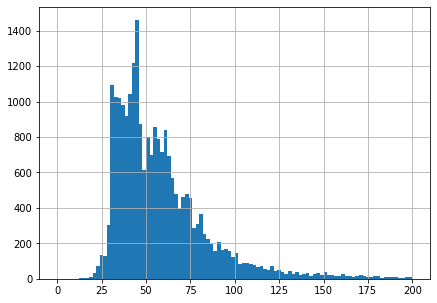

In [38]:
realty['total_area'].hist(bins=100, figsize=(7,5), range=(0,200))
plt.show()

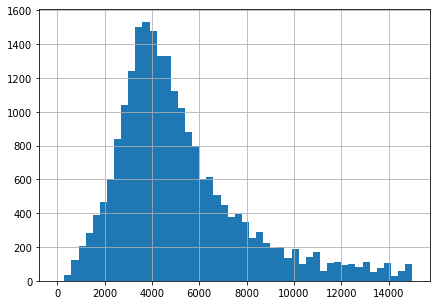

In [39]:
realty['last_price'].hist(bins=50, figsize=(7,5), range=(0, 15000))
plt.show()

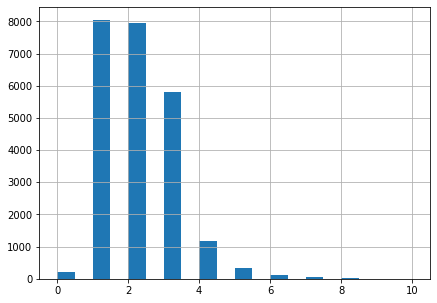

In [40]:
realty['rooms'].hist(bins=20, figsize=(7,5), range=(0,10))
plt.show()

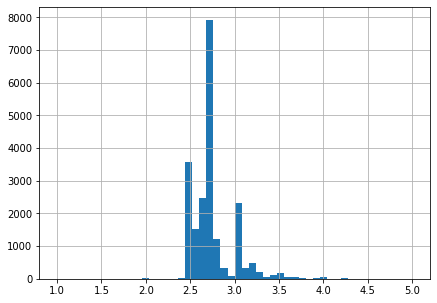

In [41]:
realty['ceiling_height'].hist(bins=50, figsize=(7,5), range=(1,5))
plt.show()

Чаще всего встречаются средние 1-2-комнатные квартиры площадью 40-50 кв.м, ценой 3-5 млн.руб., с потолками 2.65 м. Типичный портрет новостроек в ипотеку. Есть и эксклюзивные квартиры с 19 комнатами, квартиры-студии, но их немного, и они не оказывают большое влияние на общую выборку.

Попробуем определить выбросы по диаграммам размаха:

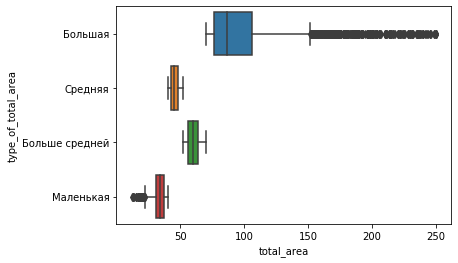

In [42]:
ax = sns.boxplot(y='type_of_total_area', x='total_area', orient='h', data=realty)

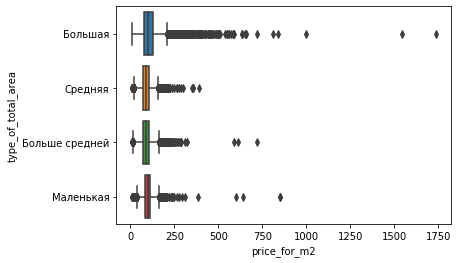

In [43]:
ax = sns.boxplot(y='type_of_total_area', x='price_for_m2', orient='h', data=realty)

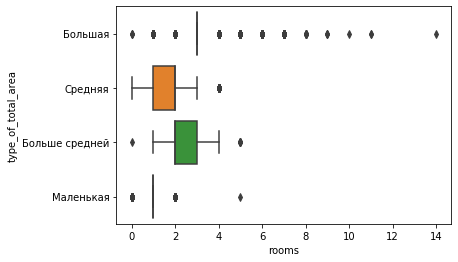

In [44]:
ax = sns.boxplot(y='type_of_total_area', x='rooms', orient='h', data=realty)

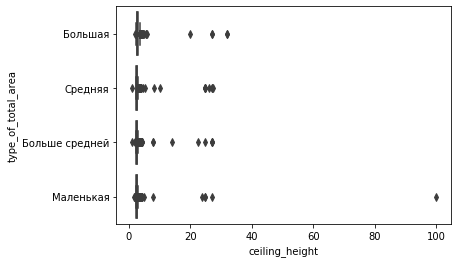

In [45]:
ax = sns.boxplot(y='type_of_total_area', x='ceiling_height', orient='h', data=realty)

Согласно гистограммам и диаграммам размаха, в датафрейм попадут следующие значения:  
* общая площадь 12-250 м.кв.;
* количество комнат 0-5;
* высота потолков 2,3-4 м;
* цена за м кв. жилья - 15-500 тыс. руб.

Сформируем датафрейм без выбросов:

In [46]:
realty = realty.query('12 <= total_area <= 250 and 0 <= rooms <= 5 and 2.3 <= ceiling_height <= 4 and 15 <= price_for_m2 <= 500')

In [47]:
realty.shape[0]

20759

Удалили 2940 строк, это примерно 12,4% данных, что допустимо. Посмотрим, как продаются квартиры.

In [48]:
realty['days_exposition'].describe()

count    17974.000000
mean       183.363358
std        222.337238
min          1.000000
25%         45.000000
50%         97.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры, дней: 183
Медианное время продажи квартиры, дней: 97


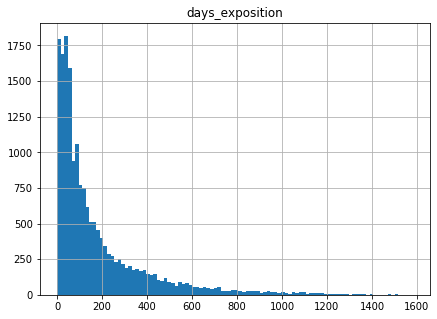

In [49]:
realty.hist('days_exposition', bins=100, figsize=(7,5))
print('Среднее время продажи квартиры, дней: {:.0f}'.format(realty['days_exposition'].mean()))
print('Медианное время продажи квартиры, дней: {:.0f}'.format(realty['days_exposition'].median()))

Из-за выбросов в виде 1580 дней продажи среднее значение (183 дня) сильно отличается от медианы (97 дней). Медиана, как мы знаем, устройчива к выбросам. Судя по гистограмме, основная масса квартир продается в период до 100 дней. Но на промежутке от 0 до 100 дней у нас три пика, далее рассмотрим их подробнее. Взглянем на диаграммы размаха:

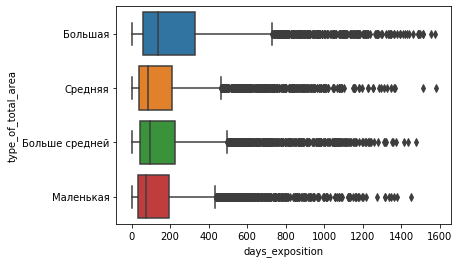

In [50]:
ax = sns.boxplot(y='type_of_total_area', x='days_exposition', orient='h', data=realty)

Очевидно, что большие квартиры и продаются дольше всех (200-700 дней), потому что они дороже, и не все покупатели могут себе такие позволить. И как мы помним, рынок у нас представлен в основном небольшими и средними типовыми квартирами, которые охотно покупают приезжие из других регионов. Спрос формирует предложение.Такие квартиры продаются максимум за 150-400 дней. Но есть и квартиры, которые проаются необычайно быстро - в течение 50 дней. Необычайно долгими продажами я бы считала показатели в 1000 дней и выше.

Ограничим время продажи 700 днями и посмотрим поближе:

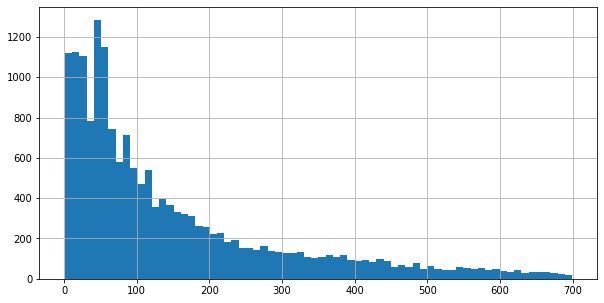

In [51]:
realty.query('days_exposition < 700')['days_exposition'].hist(bins=70, figsize=(10,5))
plt.show()

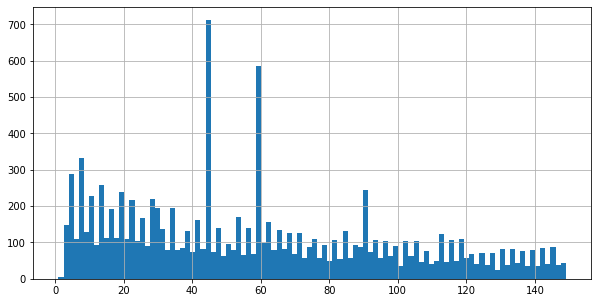

In [52]:
realty.query('0 < days_exposition < 150')['days_exposition'].hist(bins=100, figsize=(10,5))
plt.show()

Получается, что многие квартиры продаются именно на 45 и 60 день публикации объявления. Магия, не иначе. Предполагаю, что в эти дни Яндекс.Недвижимость автоматически снимает эти объявления, поэтому нельзя сказать, действительно ли эти квартиры были проданы или просто автоматически сняты объявления. 

In [53]:
realty.query('days_exposition == 45 or days_exposition == 60')['days_exposition'].count()

1109

Не хотелось бы удалять из датафрейма 1109 значений, тем более, что люди действительно могли продать квартиру, но не сразу закрыть объявление.  

Посмотрим, какие же параметры квартир лучше всех коррелируются с ценой:

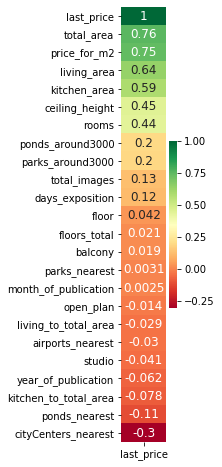

In [54]:
plt.figure(figsize=(1,8))
sns.heatmap(realty.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True, annot_kws={'size':12})
plt.show()

Построим диаграммы рассеяния:

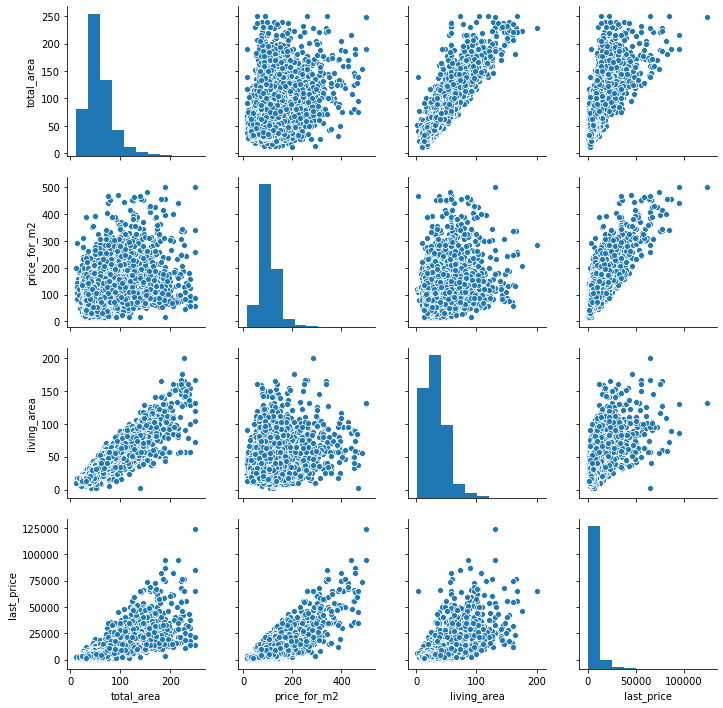

In [55]:
sns.pairplot(realty[['total_area', 'price_for_m2', 'living_area', 'last_price']])
plt.show()

Видим, что больше всего на цену квартиры влияет цена квадратного метра площади и общая площадь (практически линейная зависимость). 

In [56]:
def pivot_and_plot(data, index, color):
    list_to_sort_false_last_price_rot45 = ['type_of_total_area', 'floor_type', 'category_from_center_distance']
    list_to_sort_true_index = ['rooms', 'day_of_publication', 'month_of_publication', 'year_of_publication']
  
    if index in list_to_sort_false_last_price_rot45:
        boolean = False
        key = 'last_price'
        rot = 45
    elif index in list_to_sort_true_index:
        boolean = True
        key = index
        rot = 0
    
    data_filtered = (
        data.pivot_table(index=index, values='last_price', aggfunc='median')
        .reset_index().sort_values(by=key, ascending=boolean)
    )
    
    display(data_filtered)

    data_filtered.plot(x=index, y='last_price', kind='bar', rot=rot, color=color,
    title='Зависимость цены от ' + index , figsize=(10,6))

,type_of_total_area,last_price
0,Большая,9200
1,Больше средней,5500
3,Средняя,4250
2,Маленькая,3450


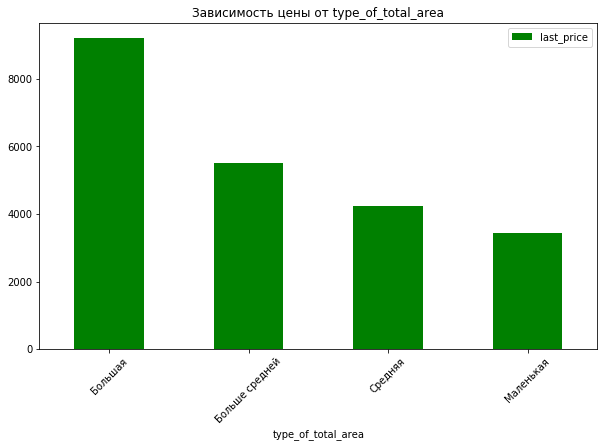

In [57]:
pivot_and_plot(realty, 'type_of_total_area', 'green')

Площадь квартиры прямо влияет на цену. Чем больше площадь, тем выше цена, что логично.

,category_from_center_distance,last_price
1,исторический центр,9500
3,престижный центр,8500
2,остальные районы,5000
0,за КАДом,4150


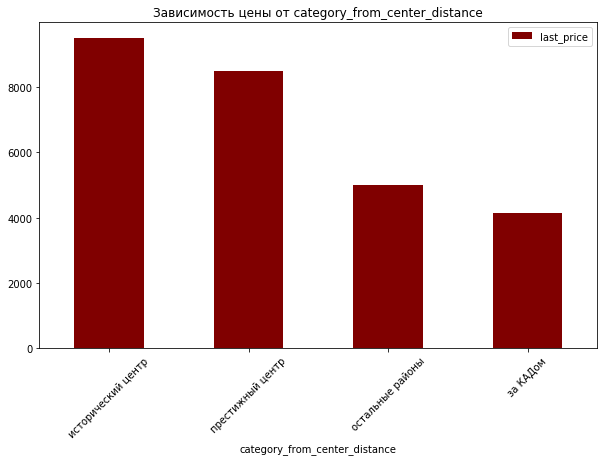

In [58]:
pivot_and_plot(realty, 'category_from_center_distance', 'maroon')

Удаленность от центра также прямо влияет на стоимость квартиры. Центр (исторический и престижный) сильно отличается по цене от квартир в остальных районах и за КАДом. Чем дальше от центра, тем дешевле.

,floor_type,last_price
0,Другой,5000
2,Последний,4570
1,Первый,4150


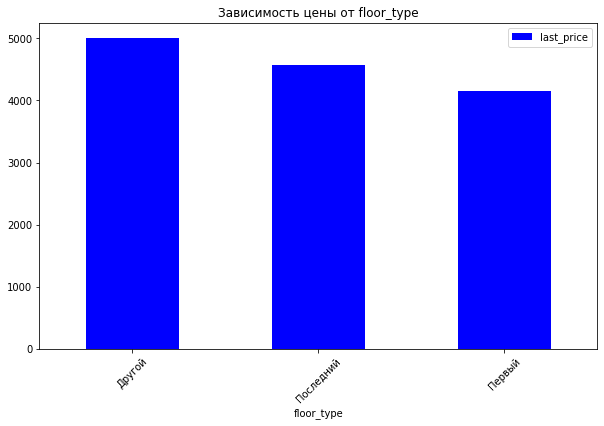

In [59]:
pivot_and_plot(realty, 'floor_type', 'blue')

Этаж также играет не последнюю роль в формировании цены квартиры. Квартиры на первом этаже дешевле, чем на последнем и других этажах. Квартиры на последнем этаже подороже квартир на первом, но все же уступают в цене другим этажам (на 8,6% дешевле других этажей).

,rooms,last_price
0,0,3150
1,1,3715
2,2,5000
3,3,6450
4,4,9250
5,5,13000


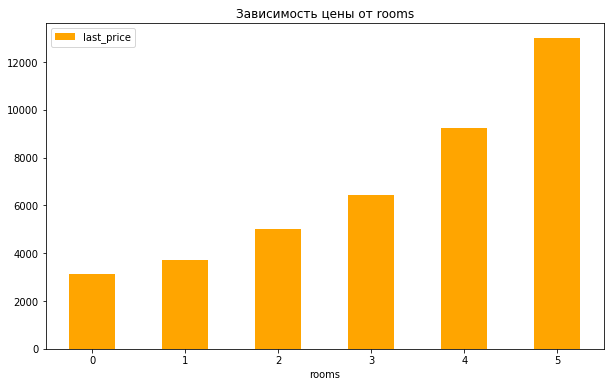

In [60]:
pivot_and_plot(realty, 'rooms', 'orange')

Действительно, с увеличением количества комнат цена квартиры становится выше.

,day_of_publication,last_price
0,1.Понедельник,4900
1,2.Вторник,4950
2,3.Среда,4940
3,4.Четверг,4897
4,5.Пятница,4800
5,6.Суббота,4750
6,7.Воскресенье,4790


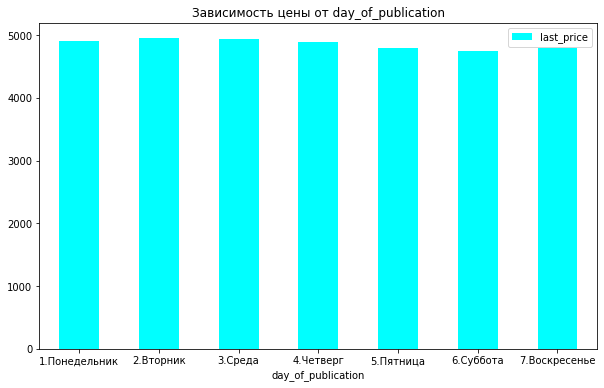

In [61]:
pivot_and_plot(realty, 'day_of_publication', 'cyan')

По зависимости цены квартиры от дня публикации объявления картина такая: самый пик цены - вторник и среда. Чуть ниже цены в понедельник и четверг, далее пятница, суббота и воскресенье. Предположу, что в субботу и воскресенье рынок недвижимости не так активен, в выходные риэлторы не работают, к понедельнику втягиваются, и только во вторник и среду у них максимальная работоспособность.

,month_of_publication,last_price
0,1,4900.0
1,2,4900.0
2,3,4850.0
3,4,5000.0
4,5,4800.0
5,6,4690.0
6,7,4801.0
7,8,4867.5
8,9,4900.0
9,10,4700.0


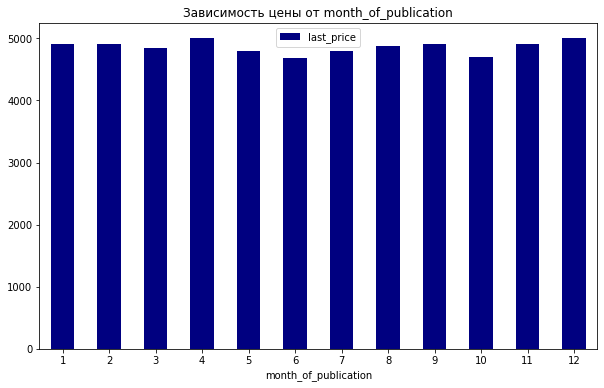

In [62]:
pivot_and_plot(realty, 'month_of_publication', 'navy')

Самые "дорогие" месяцы - апрель и декабрь. По декабрю предположу,что перед Новым годом продавцы активизируются, потому что не знают, что год грядущий им готовит, вдруг рубль упадет, и хотят продать квартиру подороже. 

,year_of_publication,last_price
0,2014,8200
1,2015,5500
2,2016,4800
3,2017,4700
4,2018,4785
5,2019,5250


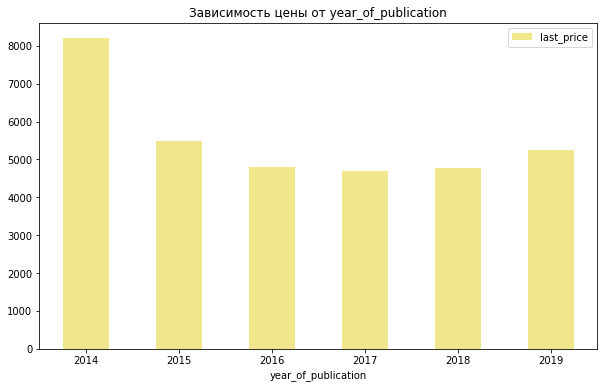

In [63]:
pivot_and_plot(realty, 'year_of_publication', 'khaki')

Самые высокие цены на недвижимость были в 2014 году. Далее цены упали. Это произошло из-за кризиса, в 2014 году рубль резко упал (в 2 раза) по отношению к доллару, соответственно, просел и рынок недвижимости (сокращение спроса, снижение темпов строительства, уменьшение рублевых цен). Затем постепенно люди стали привыкать к новому курсу доллара, и в 2019 году заметна постепенная рецессия экономики. Рассмотрим поближе 2014 год:

In [64]:
realty.query('year_of_publication == 2014')['month_of_publication'].value_counts()

12    106
11     20
Name: month_of_publication, dtype: int64

По 2014 году у нас объявления подавались в ноябре-декабре. Как нам известно, пик кризиса пришелся на 15 и 16 декабря - "черный понедельник" и "черный вторник", когда произошло резкое падение курса рубля. Это привело к ажиотажному спросу на недвижимость в качестве вложения денежных накоплений.  

In [65]:
pivot_years = realty.pivot_table(
    index='year_of_publication', values='last_price', aggfunc='count').sort_values(by='year_of_publication'
)                                                                                  
                                                                                  
pivot_years.columns = ['ad_quantity']
display(pivot_years)

,ad_quantity
year_of_publication,
2014,126
2015,1059
2016,2430
2017,7143
2018,7431
2019,2570


Видим, что в 2017-2018 годах подавалось просто огромное количество объявлений, и такое высокое предложение на рынке недвижимости не соответствовало спросу, потому продавцам пришлось снижать цены.

Выведем на экран ТОП-10 населенных пунктов по количеству объявлений:

In [66]:
top10_mean_price_m2 = realty.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count', 'mean'])
top10_max_min = realty.pivot_table(index='locality_name', values='last_price', aggfunc=['max', 'min'])

top10 = top10_mean_price_m2.join(top10_max_min)
   
#ad_quantity - количество объявлений
top10.columns = ['ad_quantity', 'mean_price_for_m2', 'max_last_price', 'min_last_price']

top10.sort_values(by='ad_quantity', ascending=False).head(10)

,ad_quantity,mean_price_for_m2,max_last_price,min_last_price
locality_name,,,,
Санкт-Петербург,15408,112.768886,124350,1190
посёлок Шушары,438,78.620776,10990,1500
Пушкин,365,103.154247,29500,1990
Колпино,336,75.310417,12750,2100
посёлок Парголово,326,90.332209,9140,1400
Всеволожск,270,67.358519,11000,1290
Петергоф,201,84.753234,22000,2100
посёлок Мурино,198,87.369192,7500,1730
Сестрорецк,183,101.757923,21700,2800


Самое большое количество объявлений ожидаемо в Санкт-Петербурге. Самая высокая цена за квадратный метр жилья в Санкт-Петербурге, за нам следует г. Пушкин. Самая низкая цена за квадратный метр жилья во Всеволжске.

Посмотрим, как стоимость кв.м жилья зависит от удаленности от центра:

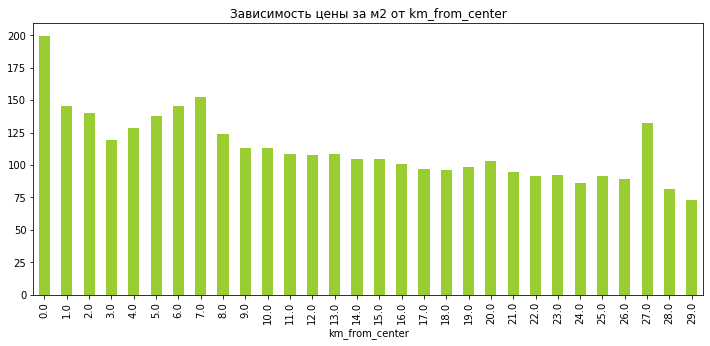

In [67]:
realty['km_from_center'] = (realty['cityCenters_nearest']/1000).round(0)
spb = realty.query('"Санкт-Петербург" in locality_name and cityCenters_nearest.notnull()')
spb_grouped = spb.groupby('km_from_center')['price_for_m2'].mean()

spb_grouped.plot(x='km_from_center', y='price_for_m2', kind='bar', color='yellowgreen',
figsize=(12,5), title='Зависимость цены за м2 от km_from_center')
plt.show()


На графике видно резкое падение цены после 7 км от центра. То есть, когда выше мы определили границу центра в 8 км, мы не сильно ошиблись. Следует отметить, что на графике присуствуют значения свыше 17 км (а это уже за границей города), но при этом для этих значений указано "Санкт-Петербург" в столбце "locality_name". Посмотрим, что же такое у нас произошло на 3 км от центра.

In [68]:
spb.query('km_from_center == 3').pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count'])

,mean,count
,last_price,last_price
rooms,,
0,3100.000000,1
1,5384.470588,34
2,8331.898148,108
3,10452.796296,108
4,13012.604167,48
5,13823.461538,26


На расстоянии 3 км от центра у нас представлены в основном квартиры за 8,3-10,4 млн руб. Получается, квартиры на границе "исторического центра" стоят дешевле, чем квартиры в "престижном" центре (Василеостровский, Петроградский районы).

In [69]:
spb.query('"Санкт-Петербург" in locality_name and km_from_center == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,type_of_total_area,category_from_center_distance,year_of_publication,month_of_publication,day_of_publication,floor_type,price_for_m2,living_to_total_area,kitchen_to_total_area,km_from_center
748,13,14350,74.0,2017-11-28,2,3.13,5.0,30.0,3,NaN,...,Большая,за КАДом,2017,11,2.Вторник,Другой,193.9,0.41,0.34,27.0
5961,6,2250,32.0,2018-02-27,1,2.68,2.0,16.5,2,NaN,...,Маленькая,за КАДом,2018,2,2.Вторник,Последний,70.3,0.52,0.22,27.0


На 27-м километре от центра представлены всего 2 квартиры, но такие разные: за 2,25 млн. руб. и за 14,35 млн. руб. Поэтому и получилось такое высокое среднее значение.

Проанализируем центральную территорию:

In [70]:
spb_center = spb.query('km_from_center <= 7')
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3291.000000,3291.000000,3291.000000,3291.000000
mean,83.305813,11947.141294,2.626557,3.069140
std,38.369127,10216.510906,1.102365,0.261731
min,12.000000,1600.000000,0.000000,2.400000
25%,55.400000,6500.000000,2.000000,3.000000
50%,75.500000,8800.000000,3.000000,3.070000
75%,102.000000,13000.000000,3.000000,3.200000
max,250.000000,124350.000000,5.000000,4.000000


Центр города представлен различными квартирами. Но в среднем, это трехкомнатная квартира 83 кв.м, ценой 8-12 млн. руб, с потолками свыше 3 метров. Взглянем на самую дешевую квартиру:

In [71]:
spb_center.query('last_price == 1600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,type_of_total_area,category_from_center_distance,year_of_publication,month_of_publication,day_of_publication,floor_type,price_for_m2,living_to_total_area,kitchen_to_total_area,km_from_center
23394,10,1600,92.0,2018-07-10,3,3.0,6.0,13.0,1,NaN,...,Большая,престижный центр,2018,7,2.Вторник,Первый,17.4,0.14,0.11,4.0


Не очень понятно. Престижный центр, 3 комнаты, 92 кв.м за 1,6 млн. руб.? Неужели первый этаж так влияет на стоимость?

In [72]:
spb_center.query('floor == 1 and rooms == 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,type_of_total_area,category_from_center_distance,year_of_publication,month_of_publication,day_of_publication,floor_type,price_for_m2,living_to_total_area,kitchen_to_total_area,km_from_center
181,2,7900,71.8,2017-08-23,3,3.00,5.0,38.700000,1,NaN,...,Большая,престижный центр,2017,8,3.Среда,Первый,110.0,0.54,0.17,3.0
291,10,5900,70.0,2017-01-24,3,2.51,5.0,47.400000,1,NaN,...,Большая,престижный центр,2017,1,2.Вторник,Первый,84.3,0.68,0.11,4.0
330,16,7100,50.0,2016-04-20,3,3.23,5.0,31.500000,1,NaN,...,Средняя,исторический центр,2016,4,3.Среда,Первый,142.0,0.63,0.10,2.0
870,11,5890,65.0,2015-11-18,3,2.65,16.0,39.500000,1,False,...,Больше средней,престижный центр,2015,11,3.Среда,Первый,90.6,0.61,0.17,7.0
1246,13,6590,74.0,2018-02-16,3,3.07,5.0,57.236431,1,NaN,...,Большая,престижный центр,2018,2,5.Пятница,Первый,89.1,0.77,0.09,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22859,19,5950,72.0,2016-04-22,3,3.07,9.0,42.000000,1,NaN,...,Большая,престижный центр,2016,4,5.Пятница,Первый,82.6,0.58,NaN,7.0
23001,20,5800,64.9,2017-05-29,3,2.91,4.0,50.900000,1,NaN,...,Больше средней,престижный центр,2017,5,1.Понедельник,Первый,89.4,0.78,0.08,3.0
23085,4,5900,81.5,2017-07-31,3,3.50,6.0,43.700000,1,NaN,...,Большая,исторический центр,2017,7,1.Понедельник,Первый,72.4,0.54,0.17,2.0
23178,7,5950,60.0,2018-02-01,3,2.80,5.0,42.000000,1,NaN,...,Больше средней,престижный центр,2018,2,4.Четверг,Первый,99.2,0.70,0.13,3.0


Скорее всего, продается комната в коммунальной квартире, потому что жилая площадь составляет 13 кв.м при ообщей 92 кв.м. Взглянем на зависимость цены квартир в центре от различных парметров:

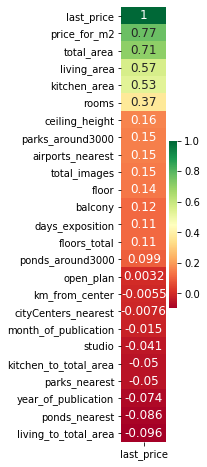

In [73]:
plt.figure(figsize=(1,8))
sns.heatmap(spb_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True, annot_kws={'size':12})
plt.show()

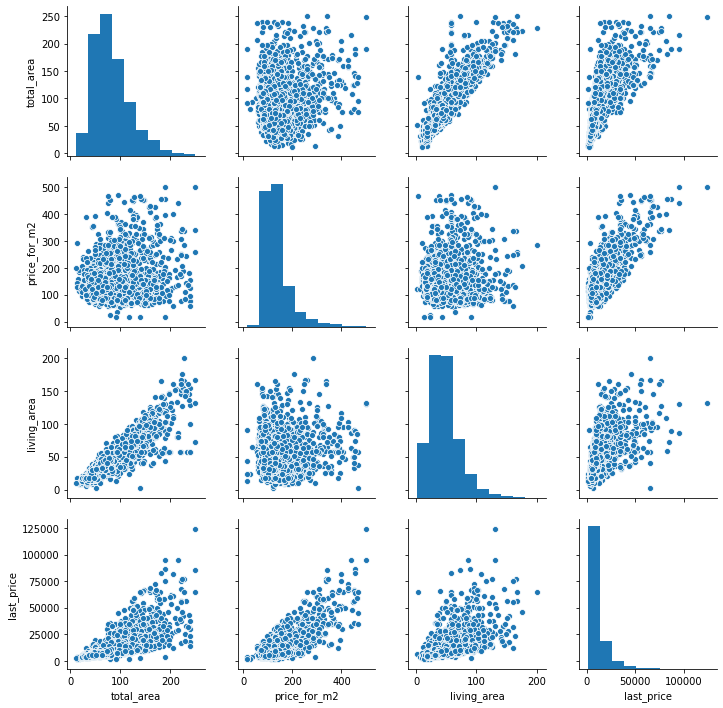

In [74]:
sns.pairplot(spb_center[['total_area', 'price_for_m2', 'living_area', 'last_price']])
plt.show()

Ожидаемо, что как и везде, в центре города общая площадь и цена за квадратный метр прямо влияют на стоимость квартиры.

,type_of_total_area,last_price
0,Большая,11900
1,Больше средней,7300
3,Средняя,5900
2,Маленькая,4500


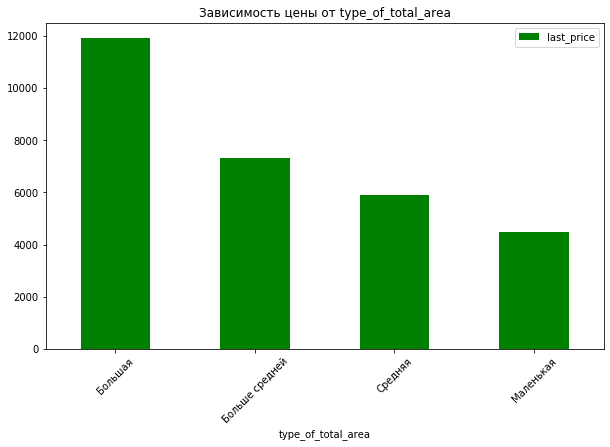

In [75]:
pivot_and_plot(spb_center, 'type_of_total_area', 'green')

Зависимость такая же, как и по всему городу. Чем больше площадь квартиры, тем выше цена.

,category_from_center_distance,last_price
0,исторический центр,9500
1,престижный центр,8520


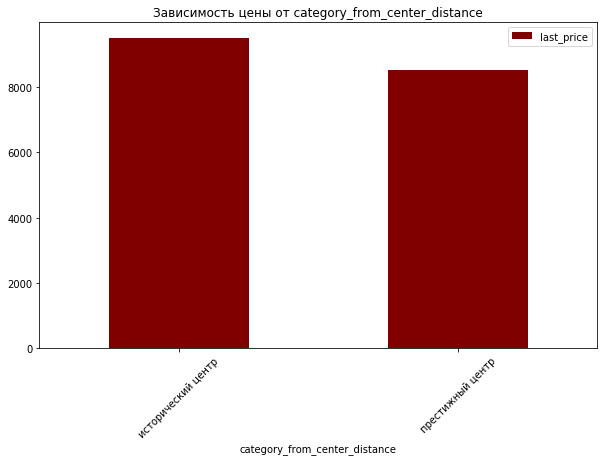

In [76]:
pivot_and_plot(spb_center, 'category_from_center_distance', 'maroon')

Квартиры и историческом центре стоят дороже, чем в престижном центре. Но как мы определили выше, на границе историчекого центра (3 км) квартиры стоят дешевле, чем в престижном центре.

,floor_type,last_price
0,Другой,9300
2,Последний,8750
1,Первый,6500


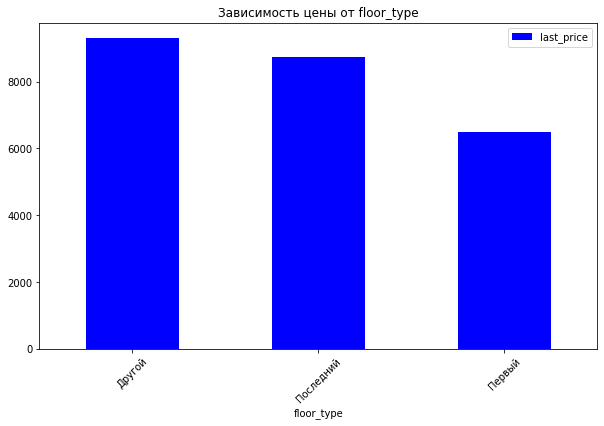

In [77]:
pivot_and_plot(spb_center, 'floor_type', 'blue')

Первый этаж в центре стоит дешевле других. А вот разница между последним и другими этажами невелика (всего 6%). Не связано ли это со знаменитыми питерскими крышами?

,rooms,last_price
0,0,4280.0
1,1,6000.0
2,2,7700.0
3,3,9900.0
4,4,11994.5
5,5,14000.0


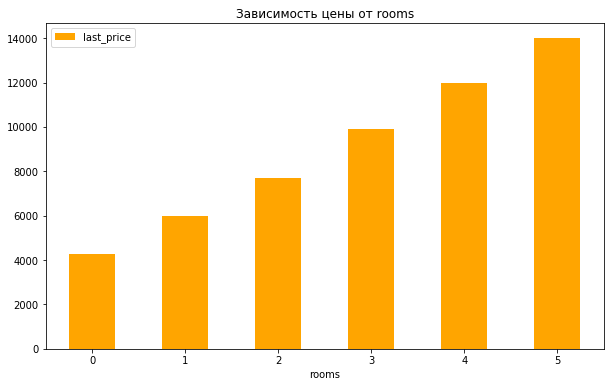

In [78]:
pivot_and_plot(spb_center, 'rooms', 'orange')

Цена квартиры в центре зависит от количества комнат. Так же, как и везде.

,day_of_publication,last_price
0,1.Понедельник,9000.0
1,2.Вторник,8752.5
2,3.Среда,8850.0
3,4.Четверг,8500.0
4,5.Пятница,8900.0
5,6.Суббота,8250.0
6,7.Воскресенье,8935.0


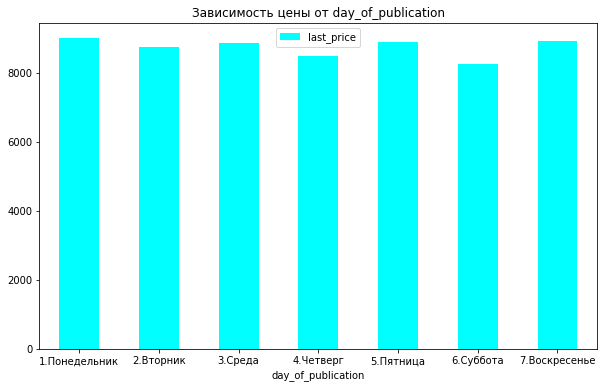

In [79]:
pivot_and_plot(spb_center, 'day_of_publication', 'cyan')

Самые "дорогие" дни - воскресенье и понедельник. Суббота - самый "дешевый" день. Возможно, риэлторы недвижимости в центре активно работают в воскресенье?

,month_of_publication,last_price
0,1,9100.0
1,2,9060.0
2,3,8990.0
3,4,8700.0
4,5,8475.0
5,6,8550.0
6,7,8743.5
7,8,8800.0
8,9,9200.0
9,10,8500.0


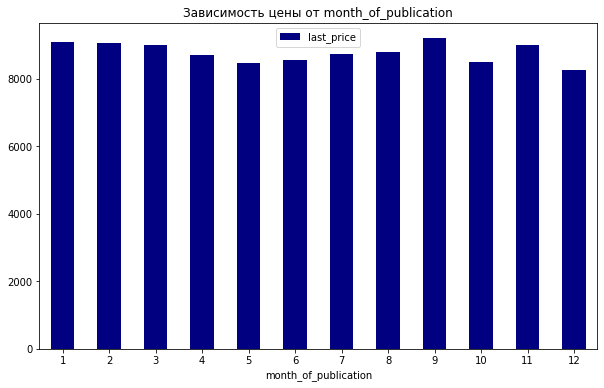

In [80]:
pivot_and_plot(spb_center, 'month_of_publication', 'navy')

Самый "дорогой" месяц - сентябрь, а самый "дешевый" - декабрь. Отчего-то в декабре квартиры в центре дешевеют, в отличие от квартир в других районах.

,year_of_publication,last_price
0,2014,17600
1,2015,9800
2,2016,9200
3,2017,8700
4,2018,8500
5,2019,8900


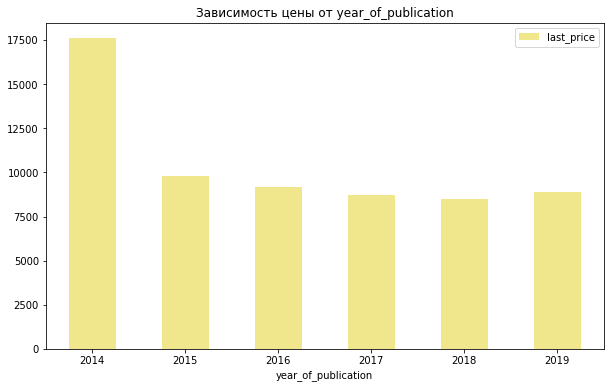

In [81]:
pivot_and_plot(spb_center, 'year_of_publication', 'khaki')

In [82]:
pivot_center_years = spb_center.pivot_table(
     index='year_of_publication', values='last_price', aggfunc='count').sort_values(by='year_of_publication'
)
pivot_center_years.columns = ['ad_quantity']
display(pivot_center_years)

,ad_quantity
year_of_publication,
2014,25
2015,301
2016,474
2017,1161
2018,978
2019,352


Зависимость цены от года публикации не отличается от зависимости по всему городу. Центр города также настиг кризис, также резко упали цены на недвижимость в 2015 году, и также с 2019 года намечается постепенная тенденция к росту. В центре города так же, как и везде, было большое количество объявлений о продаже в 2017-2018 годах, что повлияло на демпинг цены.

### Шаг 5. Общий вывод  <a id='step5'></a>

Будет наглядно, если мы представим сравнение недвижимости в центре (до 7 км) и других районах города на одном графике.

In [83]:
#другие районы
spb_not_center = spb.query('7 < km_from_center <= 17')

In [84]:
def two_plots(index):
    
    list_to_sort_false_last_price_rot45 = ['type_of_total_area', 'floor_type']
    list_to_sort_true_index = ['rooms', 'day_of_publication', 'month_of_publication', 'year_of_publication']
  
    if index in list_to_sort_false_last_price_rot45:
        boolean = False
        key = 'last_price'
        rot = 45
    elif index in list_to_sort_true_index:
        boolean = True
        key = index
        rot = 0
    
    ax = plt.gca()
    
    spb_center_filtered = (
        spb_center.pivot_table(index=index, values='last_price', aggfunc='median')
         .reset_index().sort_values(by=key, ascending=boolean)
    )
        
    spb_not_center_filtered = (
        spb_not_center.pivot_table(index=index, values='last_price', aggfunc='median')
        .reset_index().sort_values(by=key, ascending=boolean)
    )

    spb_center_filtered.plot(x=index, y='last_price', kind='bar', figsize=(10,5),
    ax=ax, ec='black', color='red', rot=rot)
    
    spb_not_center_filtered.plot(x=index, y='last_price', kind='bar', figsize=(10,5),
    ax=ax, ec='black', color='navy', rot=rot)

    plt.legend(['Центр города', 'Другие районы города'])
    ax.title.set_text('Зависимость цены от ' + index)

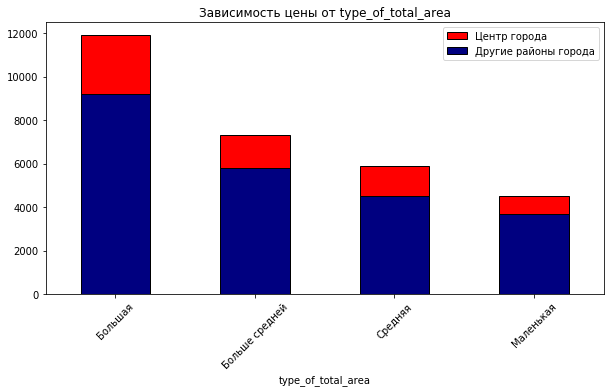

In [85]:
two_plots('type_of_total_area')

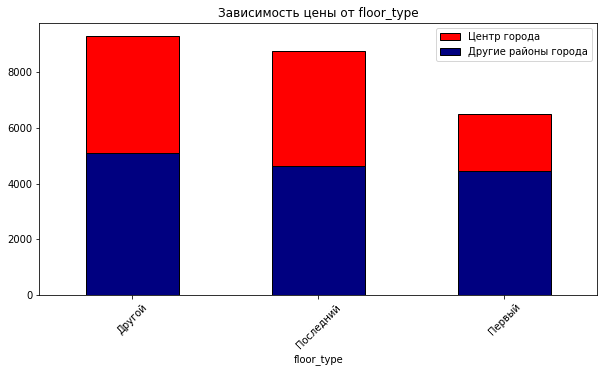

In [86]:
two_plots('floor_type')

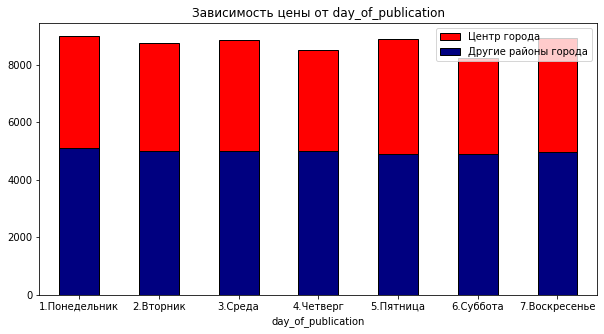

In [87]:
two_plots('day_of_publication')

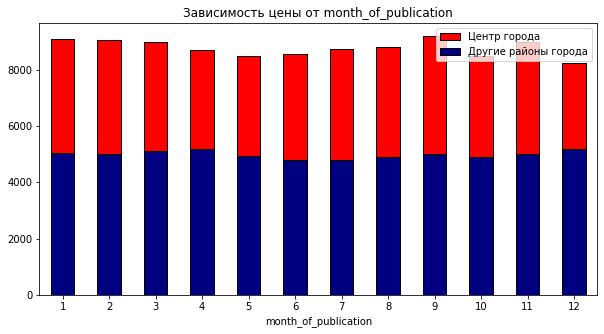

In [88]:
two_plots('month_of_publication')

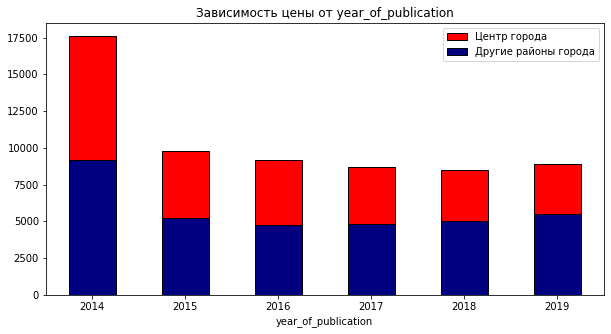

In [89]:
two_plots('year_of_publication')

## Вывод:  
Мы проделали большую работу по поиску закономерностей в данных, выяснили, какие факторы чаще всего влияют на стоимость квартиры, кроме очевидных (площадь квартиры, цена за квадратный метр). Заметили интересные отличия "центральных" квартир Санкт-Петербурга от квартир, расположенных в других районах города: последние этажи несильно теряют в цене (5,9% от других этажей). В других районах города квартиры на последних этажах стоят дешевле аж на 8,6%. Это романтика питерских крыш. Зато первый этаж в центре города ощутимо теряет в цене - 30% (в отличие от первых этажей в других районах города, где потеря в цене составляет 17%). Видимо, жить на первом этаже в центре Питера не столь романтично.  

Как в центре, так и в других районах, общая площадь квартиры непосредственно влияет на цену.
Удаленность от центра тоже влияет на цену (чем дальше - тем дешевле), но в самом центре есть интересная особенность - квартиры на границе "исторического" центра (на расстоянии 3 км от Дворцовой площади) стоят дешевле, чем квартиры в "престижном" центре (Василеостровский и Петроградский районы).

Если рассматривать по годам, то сильнее всего на цену жилья повлиял кризис в конце 2014 года, когда люди искали, куда вложить свои сбережения, уберечься от обвала рубля, а недобросовестные продавцы этим воспользовались, задирая цены до небес. Но с 2019 года ситуация на рынке жилья постепенно стабилизируется.

Исходя из нашего анализа, основные параметры квартир для построения автоматизированной системы получились следующие:
* общая площадь 12-250 м.кв.;
* количество комнат 0-5;
* высота потолков 2,3-4 м;
* цена за м кв. жилья - 15-500 тыс. руб.

Все остальные случаи (квартиры 900 кв.м, 19-комнатные пентхаусы) являются эксклюзивными.
Большие квартиры (свыше 70 кв.м) продаются дольше, чем другие (200-700 дней).
Остальные квартиры (менее 70 кв.м) продаются за 100-400 дней.


